# Predição de CRA com Regressão

Importar bibliotecas, incluindo os modelos de regressão

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import  validation_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

Leitura e reorganização das colunas dos dados de treinamento

In [16]:
data = pd.read_csv("treino.csv")
data = pd.concat([data.loc[:,'Vetorial':'LP2'], data.loc[:,'Cálculo1'], data.loc[:,'cra']], axis=1)

Correção de enviesamento dos dados, caso atinja um determinado limite de enviesamento para ambos os lados

In [17]:
inclinacao = data[:].apply(lambda x: skew(x))
limite_inclinacao = 0.4
inclinacao = inclinacao[abs(inclinacao) > limite_inclinacao]
inclinacao = inclinacao.index
data[inclinacao] = np.log1p(data[inclinacao])

Separa o treinamento dos rótulos e adiciona a característica média no conjunto de características do treinamento

In [18]:
X = data.loc[:,'Vetorial':'Cálculo1']
#calcula e adiciona a media
media = np.sum(X,axis=1)/12
X = pd.concat([X,media], axis=1)
Y = data.loc[:,'cra']

Disponibiliza a criação de características polinomiais

In [19]:
degree = 1
poly = PolynomialFeatures(degree)
X = poly.fit_transform(X)

Função que imprime os RMSEs do Treinamento e da Validação resultante da variação de algum hiperparâmetro

In [20]:
def print_rmse(train,validation,param, range, name):
    result = np.concatenate((train[:,np.newaxis], validation[:,np.newaxis]), axis=1)
    result = pd.DataFrame(result, index=range, columns=['Train','Validation'])
    print("{0} - {1} versus RMSE \n {2} \n".format(name, param, result))

Função que plota os RMSEs do Treinamento e da Validação resultante da variação de algum hiperparâmetro

In [25]:
def plot_rmse(train,validation,param, range, name):
	plt.xlabel(param)
	plt.ylabel('RMSE')
	plt.title(name)
	line1, = plt.plot(range, train, label="Train")
	line2, = plt.plot(range, validation, label="Validation")
	first_legend = plt.legend(handles=[line2], loc=1)
	ax = plt.gca().add_artist(first_legend)
	plt.legend(handles=[line1], loc=4)

Função que calcula os RMSEs do Treinamento e da Validação resultante da variação de algum hiperparâmetro

In [26]:
def calc_rmse(model,param,range,name):
    [train,validation] = validation_curve(model, X, Y, scoring="neg_mean_squared_error", param_name=param, param_range=range, cv = 5)
    train = np.sqrt(-train)
    validation = np.sqrt(-validation)
    train = train.mean(axis=1)
    validation = validation.mean(axis=1)
    print_rmse(train,validation,param, range, name)
    plot_rmse(train,validation,param, range, name)

Função que plota os resíduos versus predições dos dados do Treinamento

In [27]:
def graph_res_pred(model,X,Y,name):
	preds = pd.DataFrame({"preds":model_ridge.predict(X), "true":Y})
	preds["residuals"] = preds["true"] - preds["preds"]
	preds.plot(x = "preds", y = "residuals",kind = "scatter")

Utilizando o modelo de Regressão Linear com Regularização Baseada em Ridge (também sem regressão utilizando alpha = 0)

Ridge Regression - alpha versus RMSE 
            Train  Validation
0.00    0.482256    0.609185
0.05    0.478862    0.591933
0.10    0.479706    0.585584
0.20    0.481653    0.577482
0.30    0.483485    0.572402
0.40    0.485093    0.568828
1.00    0.491293    0.558327
3.00    0.498512    0.548149
5.00    0.501186    0.544208
10.00   0.504385    0.539398
15.00   0.506471    0.536956
30.00   0.511944    0.534568
50.00   0.519198    0.536140
60.00   0.522829    0.537872
75.00   0.528239    0.541116
100.00  0.537098    0.547508 



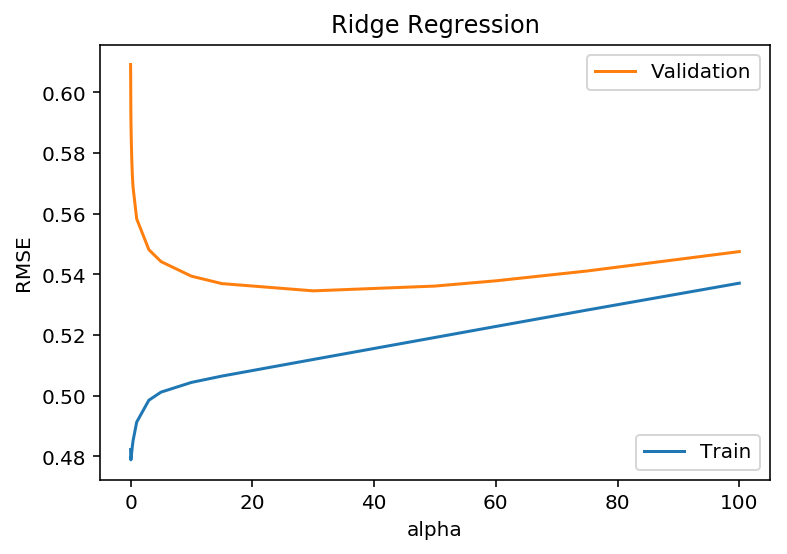

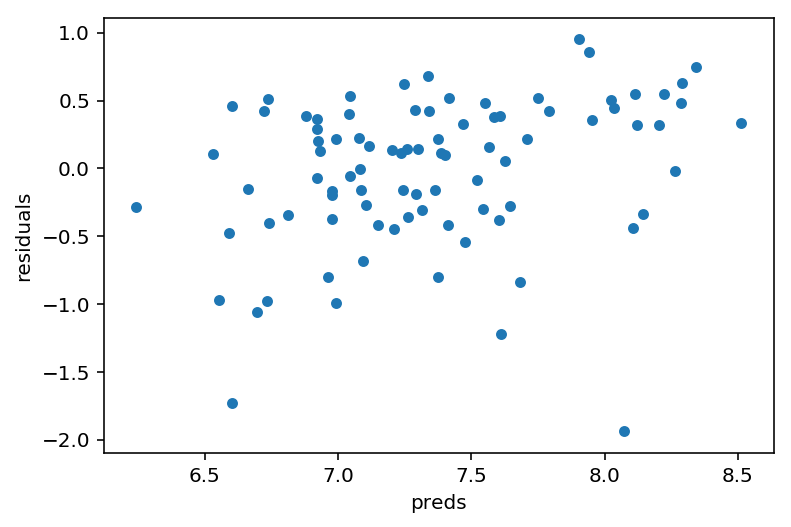

In [28]:
model_ridge = Ridge()
alphas = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 1, 3, 5, 10, 15, 30, 50, 60, 75, 100]
calc_rmse(model_ridge,"alpha",alphas,"Ridge Regression")
graph_res_pred(model_ridge,X,Y,"Ridge Regression")